In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import random
import pandas as pd

In [3]:
df = pd.read_csv('CIFR/train.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'CIFR/train.csv'

In [ ]:
y_train = df['label'].values

In [ ]:
x_train = df.drop('label',axis=1).values

In [5]:
x_train = x_train.reshape((-1,32,32,3)).astype('float32')
x_train = x_train / 255

In [7]:
df1  = pd.read_csv('CIFR/test.csv')
df1

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,159,165,166,160,156,162,159,158,159,...,130,123,145,167,182,175,145,124,129,110
1,235,231,232,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,158,158,139,132,166,182,187,193,199,205,...,45,46,44,44,43,52,37,8,3,7
3,155,167,176,190,177,166,168,166,170,179,...,52,55,70,103,105,72,53,50,52,50
4,65,70,48,30,23,40,44,45,45,40,...,102,127,156,139,131,130,147,136,146,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,76,77,76,75,76,76,76,76,78,...,228,185,177,223,239,239,235,236,234,236
9996,81,91,98,106,108,110,80,84,88,90,...,126,107,143,155,156,160,173,129,147,160
9997,20,19,15,15,14,13,12,11,10,9,...,114,112,68,50,52,52,51,50,53,47
9998,25,15,23,17,23,51,74,91,114,137,...,87,84,83,84,79,78,78,80,81,80


In [1]:
x_test = df1.values.reshape((-1,32,32,3)).astype('float32')/255

NameError: name 'df1' is not defined

In [13]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax')
])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization_3 (Bat  (None, 3072)              12288     
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 128)               393344    
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_5 (Bat  (None, 64)               

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 25s 15ms/step - loss: 1.7060 - accuracy: 0.3939
Epoch 2/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5206 - accuracy: 0.4608
Epoch 3/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4421 - accuracy: 0.4872
Epoch 4/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3782 - accuracy: 0.5098
Epoch 5/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3331 - accuracy: 0.5272
Epoch 6/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2896 - accuracy: 0.5395
Epoch 7/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2610 - accuracy: 0.5519
Epoch 8/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2330 - accuracy: 0.5614
Epoch 9/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2084 - accuracy: 0.5704
Epoch 10/15
1563/1563 [==============================] - 21s 14m

In [17]:
predict = model.predict(x_test)

313/313 [==============================] - 2s 3ms/step


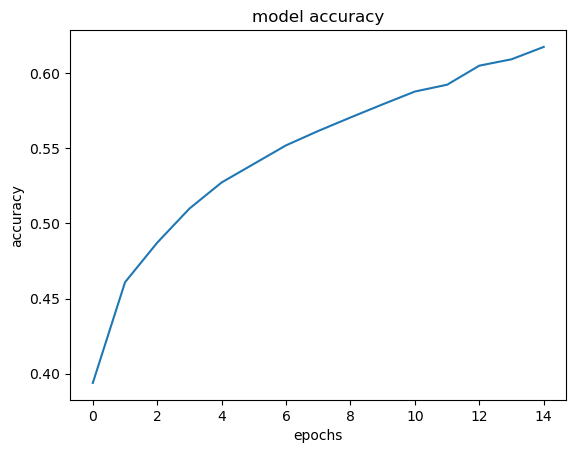

In [22]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.show()